In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize   
from sklearn.cluster import DBSCAN 

In [193]:
df = pd.read_csv('segmentacja.csv')

In [194]:
df.head()

,place_id,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5
0,6673a27b-0cd3-4ac3-987c-3aef115b7661,23393,3421,8353036
1,bf569805-2120-4fc7-bab7-c8108761f71e,16321,2011,4910306
2,4534a37c-eff7-4f66-8c2c-9017c4b17799,44429,1517,3819997
3,6214e463-c739-48ed-819e-10e06f29b683,43571,5620,20637558
4,ced7c235-7a57-4ea4-8c9e-c6645ee429fe,28357,4131,9586371


In [195]:
#Scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:])

#Normalazing data
df_scaled = normalize(df_scaled)
df_scaled = pd.DataFrame(df_scaled) 

WCSS: 207.50113640935643
WCSS: 77.04878179313481
WCSS: 53.382636910714474
WCSS: 35.79818835989982
WCSS: 25.49144880690028
WCSS: 19.766526102129504
WCSS: 16.529770264944695
WCSS: 14.22263221739733
WCSS: 12.648708111386256
WCSS: 11.359589487023294


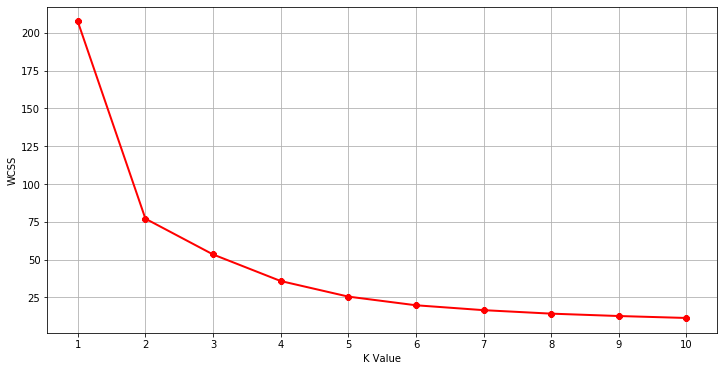

In [196]:
#WCSS - Within Cluster Sum of Squared Errors
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_scaled)
    print('WCSS:',kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [197]:
#K-MEANS, number of clusters - 4 
km = KMeans(n_clusters=4,random_state=101)
clusters = km.fit_predict(df_scaled)
df["segment"] = clusters

In [198]:
df

,place_id,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
0,6673a27b-0cd3-4ac3-987c-3aef115b7661,23393,3421,8353036,3
1,bf569805-2120-4fc7-bab7-c8108761f71e,16321,2011,4910306,0
2,4534a37c-eff7-4f66-8c2c-9017c4b17799,44429,1517,3819997,0
3,6214e463-c739-48ed-819e-10e06f29b683,43571,5620,20637558,2
4,ced7c235-7a57-4ea4-8c9e-c6645ee429fe,28357,4131,9586371,3
...,...,...,...,...,...
209,29ad9baa-e743-4d35-bea8-e840bae4d771,40286,5277,14090148,2
210,d39739fb-a4a5-4328-9843-8f70f3676761,35429,4492,13624805,3
211,e09ebcd5-c121-4909-9872-e46491e5a7aa,10286,169,415320,0
212,28b6bb74-03cb-4207-bac7-73fd18ca2cdf,26250,5005,14187010,3


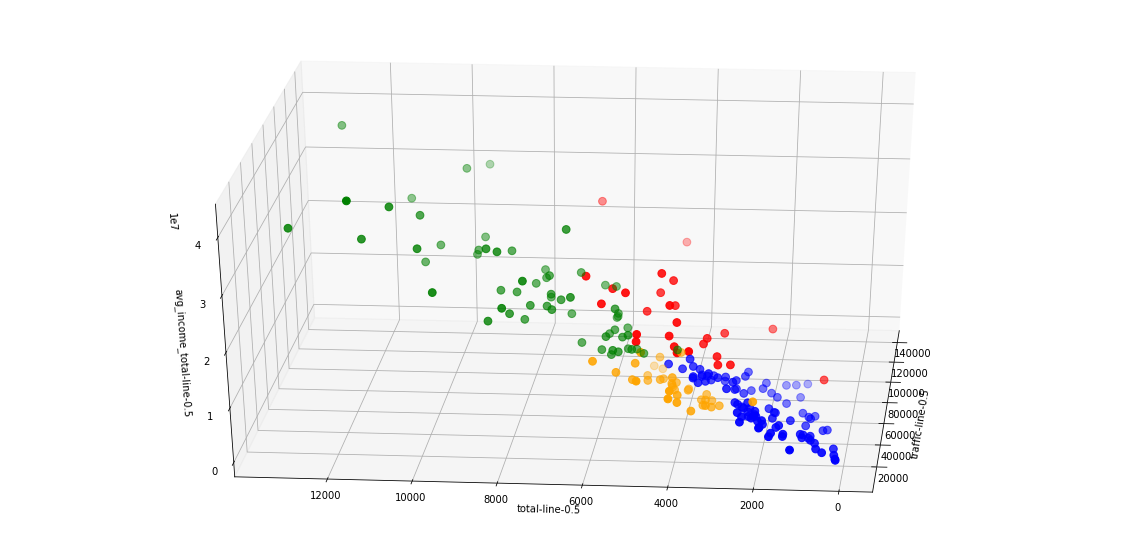

In [199]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['traffic-line-0.5'][df.segment == 0], df["total-line-0.5"][df.segment == 0], df["avg_income_total-line-0.5"][df.segment == 0], c='blue', s=60)
ax.scatter(df['traffic-line-0.5'][df.segment == 1], df["total-line-0.5"][df.segment == 1], df["avg_income_total-line-0.5"][df.segment == 1], c='red', s=60)
ax.scatter(df['traffic-line-0.5'][df.segment == 2], df["total-line-0.5"][df.segment == 2], df["avg_income_total-line-0.5"][df.segment == 2], c='green', s=60)
ax.scatter(df['traffic-line-0.5'][df.segment == 3], df["total-line-0.5"][df.segment == 3], df["avg_income_total-line-0.5"][df.segment == 3], c='orange', s=60)
#ax.scatter(df['traffic-line-0.5'][df.segment == 4], df["total-line-0.5"][df.segment == 4], df["avg_income_total-line-0.5"][df.segment == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("traffic-line-0.5")
plt.ylabel("total-line-0.5")
ax.set_zlabel('avg_income_total-line-0.5')
plt.show()

In [200]:
df.head()

,place_id,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
0,6673a27b-0cd3-4ac3-987c-3aef115b7661,23393,3421,8353036,3
1,bf569805-2120-4fc7-bab7-c8108761f71e,16321,2011,4910306,0
2,4534a37c-eff7-4f66-8c2c-9017c4b17799,44429,1517,3819997,0
3,6214e463-c739-48ed-819e-10e06f29b683,43571,5620,20637558,2
4,ced7c235-7a57-4ea4-8c9e-c6645ee429fe,28357,4131,9586371,3


In [201]:
df['segment'].value_counts()

0    89
2    62
3    36
1    27
Name: segment, dtype: int64

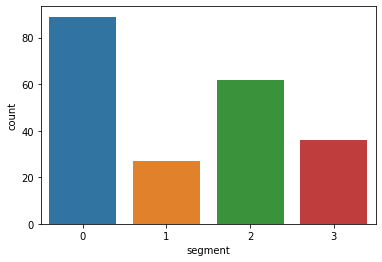

In [202]:
sns.countplot(data=df,x='segment')

In [220]:
df_segment1 = df[df['segment']==0]
df_segment2 = df[df['segment']==1]
df_segment3 = df[df['segment']==2]
df_segment4 = df[df['segment']==3]

In [221]:
#traffic - natężenie ruchu w promieniu 0,5 km
#total - łączna liczba mieszkańców w promieniu 0,5 km
#avg_income_total - łączna siła nabywcza mieszkańców

In [222]:
df_segment1.describe()

,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
count,89.000000,89.000000,8.900000e+01,89.0
mean,30706.617978,2051.629213,5.689722e+06,0.0
std,12106.429120,1007.510325,2.954873e+06,0.0
min,7464.000000,169.000000,4.153200e+05,0.0
25%,20500.000000,1235.000000,3.659337e+06,0.0
50%,30464.000000,2072.000000,5.514164e+06,0.0
75%,40107.000000,2706.000000,7.880143e+06,0.0
max,61214.000000,4313.000000,1.240418e+07,0.0


In [223]:
df_segment2.describe()

,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
count,27.000000,27.000000,2.700000e+01,27.0
mean,72562.111111,4369.407407,1.396167e+07,1.0
std,23367.360919,1302.973146,4.874951e+06,0.0
min,44643.000000,767.000000,2.476300e+06,1.0
25%,56500.000000,3632.000000,1.054028e+07,1.0
50%,66857.000000,4452.000000,1.380805e+07,1.0
75%,79375.000000,5148.500000,1.764786e+07,1.0
max,142536.000000,6683.000000,2.354735e+07,1.0


In [224]:
df_segment3.describe()

,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
count,62.000000,62.000000,6.200000e+01,62.0
mean,50439.532258,7570.032258,2.307554e+07,2.0
std,16658.635235,2090.227840,7.021964e+06,0.0
min,27821.000000,4120.000000,1.352147e+07,2.0
25%,39687.750000,5679.000000,1.712354e+07,2.0
50%,46035.500000,7233.500000,2.205512e+07,2.0
75%,58705.250000,8892.500000,2.718273e+07,2.0
max,107536.000000,13237.000000,4.256059e+07,2.0


In [225]:
df_segment4.describe()

,traffic-line-0.5,total-line-0.5,avg_income_total-line-0.5,segment
count,36.000000,36.000000,3.600000e+01,36.0
mean,24314.444444,4086.277778,1.069619e+07,3.0
std,5996.512693,755.277342,2.160762e+06,0.0
min,13929.000000,2182.000000,7.840353e+06,3.0
25%,20196.250000,3560.500000,9.270660e+06,3.0
50%,24285.500000,4122.500000,1.052101e+07,3.0
75%,26428.750000,4530.500000,1.150125e+07,3.0
max,38714.000000,5988.000000,1.618599e+07,3.0
